In [3]:
cd tempe_town_lake

(bookmark:tempe_town_lake) -> /Users/lionel/src/tempe_town_lake
/Users/lionel/src/tempe_town_lake


In [4]:
import stat_support

import pdir

pdir(stat_support)

module attribute:
    __cached__, __file__, __loader__, __name__, __package__, __spec__
other:
    __builtins__, np
special attribute:
    __doc__
function:
    find_outlier_indices: 
    find_outliers: values should be a Pandas Series
    lower_bound_fn: 
    outlier_bounds: 
    upper_bound_fn: 
    x_is_outlier: 

In [5]:
from wind_analysis import load_winds

In [6]:
df = load_winds("ddg.csv")

In [7]:
%run wind_analysis.py

In [8]:
df.columns

Index(['timestamp', 'drct', 'sknt'], dtype='object')

In [13]:
%run stat_support.py

In [10]:
values.describe()

NameError: name 'values' is not defined

In [ ]:
find_outliers(df.sknt)

In [ ]:
values = df.sknt
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
q1,q3

In [ ]:
values[:10]

In [ ]:
find_outlier_indices(values[:10])

In [ ]:
list(enumerate(values[:10]))

In [ ]:
lower = q1 - 1.5 * (q3 - q1)
upper = q3 + 1.5 * (q3 - q1)
q1, q3, [(i, lower, v <=lower, upper, v >= upper, v, is_outlier(v, q1, q3)) for i,v in enumerate(values[:10])]

In [ ]:
from matplotlib import pyplot as plt
values.hist()
plt.show()

In [ ]:
find_outliers(np.array(df.sknt))

checking 204242 values (q1=3.0, q3=7.0, iqr_scale=5.5): <= -19.000000 or >= 29.000000
outlier count = 26


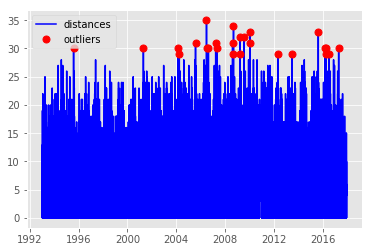

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# The data set is so large, the number of "outliers" is unreasonably large.
# So we choose a "scale" for the inter-quartile range that requires outliers 
# to be more than just a few SDs from the mean.
#iqr_scale = 1.5
iqr_scale = 5.5

def outlier_bounds(values):

    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    lower_bound = q1 - iqr_scale * (q3 - q1)
    upper_bound = q3 + iqr_scale * (q3 - q1)
    print("checking %d values " % (len(values)) +
          "(q1=%.1f, q3=%.1f, iqr_scale=%.1f): " % (q1, q3, iqr_scale) +
          "<= %f or >= %f" % (lower_bound, upper_bound))
    return lower_bound, upper_bound


def find_outlier_indices(values):

    lower, upper = outlier_bounds(values)
    if hasattr(values, "describe"):
        values.describe()
    indices_of_outliers = []
    for ind, value in enumerate(values):
        if (value <= lower) or (value >= upper):
            indices_of_outliers.append(ind)
    return indices_of_outliers


def plot_outliers(dist):
    """dist is an array indexed by position"""
    dist_indices = find_outlier_indices(dist)
    #print(dist)
    print("outlier count = %d" % (len(dist_indices)))
    fig = plt.figure()
    ax = fig.add_subplot(111)               # 1x1 grid, first subplot
    ax.plot(dist, 'b-', label='distances')
    ax.plot(dist[dist_indices],
         'ro',
        markersize = 7,
        label='outliers')
    ax.legend(loc='best') 
    plt.show()

    
from wind_analysis import load_winds
df = load_winds("ddg.csv")
plot_outliers(df.sknt)


In [11]:
dist = df.sknt
dist_indices = list(find_outlier_indices(dist))
so = dist[dist.index.notin(dist_indices)]
len(dist_indices)

checking 102869 values (q1=5.0, q3=10.0, iqr_scale=5.5): <= -22.240000 or >= 37.280000


AttributeError: 'DatetimeIndex' object has no attribute 'notin'

In [2]:
# Run this after restarting the kernel!
cd  tempe_town_lake

(bookmark:tempe_town_lake) -> /Users/lionel/src/tempe_town_lake
/Users/lionel/src/tempe_town_lake


In [15]:
from wind_analysis import load_winds
from stat_support import find_outlier_indices

df = load_winds("ddg-ffz.csv")
df.describe()
outliers = find_outlier_indices(df.sknt, iqr_scale=20)
print("outlier count = %d" % (len(outliers)))

checking 102869 values (q1=5.0, q3=10.0, iqr_scale=20.0): <= -94.160000 or >= 109.200000
outlier count = 32


In [18]:
df[df.sknt > 100][:10]

,timestamp,drct,sknt
Hourly,,,
1996-09-29 18:00:00,1996-09-29 17:45:00,0.0,209.00
1996-10-17 18:00:00,1996-10-17 17:49:00,150.0,112.00
1996-12-09 18:00:00,1996-12-09 18:04:00,90.0,745.57
1997-05-18 03:00:00,1997-05-18 02:45:00,0.0,412.00
1997-09-17 16:00:00,1997-09-17 15:47:00,0.0,504.00
1997-10-08 16:00:00,1997-10-08 15:45:00,0.0,405.00
1998-01-31 03:00:00,1998-01-31 03:01:00,315.0,248.17
1998-05-29 23:00:00,1998-05-29 23:00:00,295.0,345.22
1998-11-19 19:00:00,1998-11-19 18:51:00,10.0,111.00


In [19]:
df["1996-09-29"]

,timestamp,drct,sknt
Hourly,,,
1996-09-29 01:00:00,1996-09-29 00:45:00,240.0,4.0
1996-09-29 02:00:00,1996-09-29 01:45:00,0.0,0.0
1996-09-29 03:00:00,1996-09-29 02:45:00,0.0,0.0
1996-09-29 13:00:00,1996-09-29 12:45:00,20.0,10.0
1996-09-29 14:00:00,1996-09-29 13:45:00,20.0,10.0
1996-09-29 15:00:00,1996-09-29 14:45:00,20.0,10.0
1996-09-29 16:00:00,1996-09-29 15:45:00,20.0,10.0
1996-09-29 17:00:00,1996-09-29 16:45:00,20.0,10.0
1996-09-29 18:00:00,1996-09-29 17:45:00,0.0,209.0


In [40]:
indices = df[df.sknt > 100][0:10].index
for i in indices:
    print("%s: %s" % (i.date(), df.loc[df.index.date == i.date()]))

1996-09-29:                                timestamp   drct   sknt
Hourly                                                
1996-09-29 01:00:00  1996-09-29 00:45:00  240.0    4.0
1996-09-29 02:00:00  1996-09-29 01:45:00    0.0    0.0
1996-09-29 03:00:00  1996-09-29 02:45:00    0.0    0.0
1996-09-29 13:00:00  1996-09-29 12:45:00   20.0   10.0
1996-09-29 14:00:00  1996-09-29 13:45:00   20.0   10.0
1996-09-29 15:00:00  1996-09-29 14:45:00   20.0   10.0
1996-09-29 16:00:00  1996-09-29 15:45:00   20.0   10.0
1996-09-29 17:00:00  1996-09-29 16:45:00   20.0   10.0
1996-09-29 18:00:00  1996-09-29 17:45:00    0.0  209.0
1996-09-29 19:00:00  1996-09-29 18:45:00  130.0    5.0
1996-09-29 21:00:00  1996-09-29 20:45:00    0.0    0.0
1996-09-29 22:00:00  1996-09-29 21:45:00  210.0    6.0
1996-09-29 23:00:00  1996-09-29 22:45:00  220.0    8.0
1996-10-17:                                timestamp   drct   sknt
Hourly                                                
1996-10-17 00:00:00  1996-10-16 23:48:00 

In [2]:
%cd tempe_town_lake

(bookmark:tempe_town_lake) -> /Users/lionel/src/tempe_town_lake
/Users/lionel/src/tempe_town_lake


checking 102845 values (q1=5.0, q3=10.0, iqr_scale=5.5): <= -22.240000 or >= 37.280000
outlier count = 78


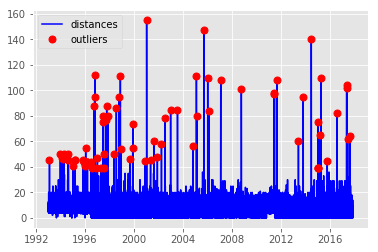

In [16]:
from wind_analysis import load_winds
from stat_support import plot_outliers

df = load_winds("ddg-ffz.csv")
sans_impossible = df[df.sknt < 200]
plot_outliers(sans_impossible.sknt)

> Load raw readings
> Load pre-deduped-readings from: ddg.csv


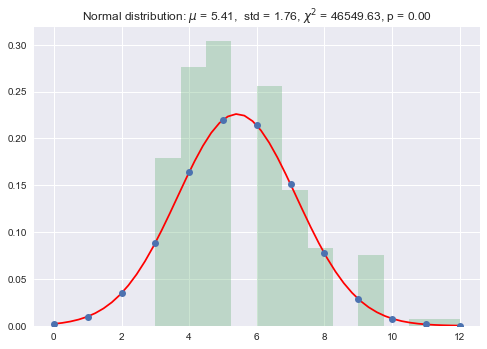

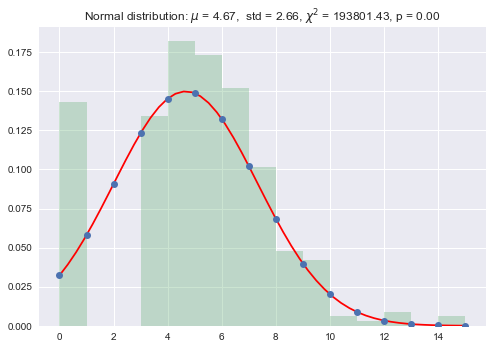

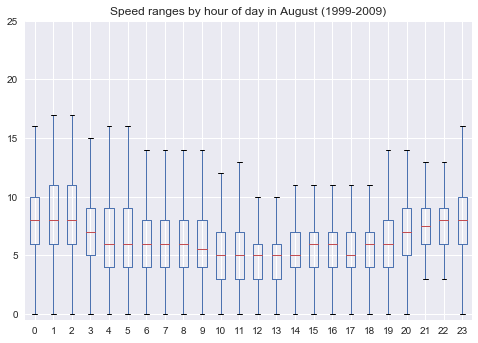

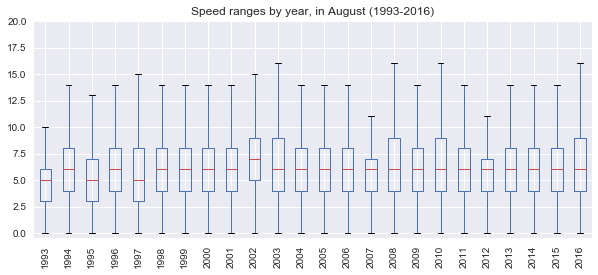

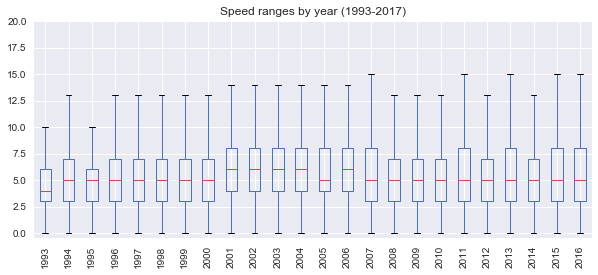

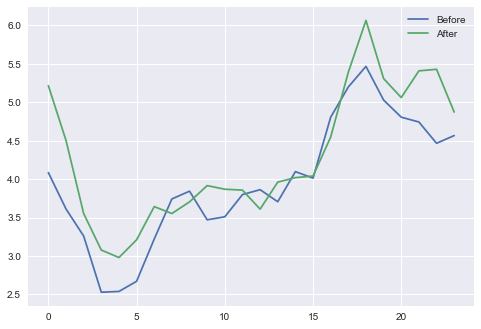

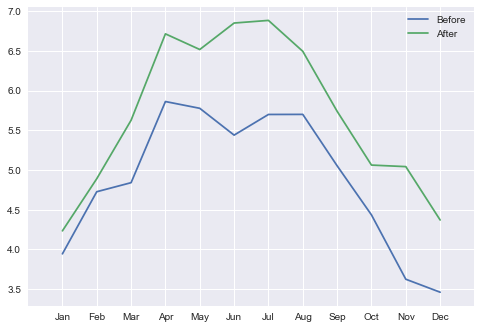

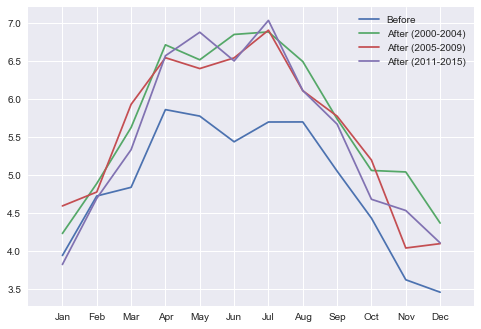

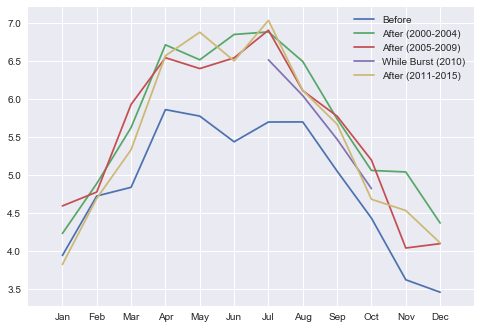

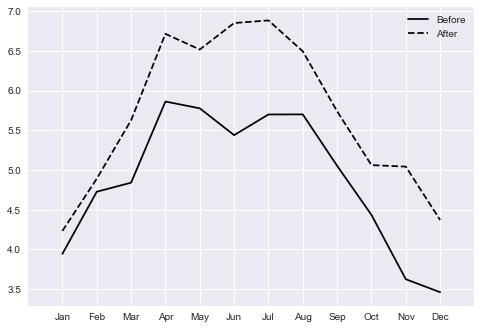

In [22]:
%run pd_debug.py